# We are looking to predict what locations cybercrimes are coming from within the top 10 locations 
# This eda will show some information on all "bwd"data  as our group is looking to drop some columns before modelling out our machine model.

In [27]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import geoip2.database
import pycountry_convert as pc

In [28]:
#Bring in the Merged CSV
File_path_Merged= r"/Users/sa8/Desktop/The-CyberChase/CyberCrimeData/feb5-12_merged.csv" 
Merged_df = pd.read_csv(File_path_Merged)

In [31]:
Merged_df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [50]:
#Beginnging the process to see what BWD columns to drop 
Merged_Bwd = Merged_df[['Total Bwd packets',
      'Total Length of Bwd Packet',
      'Bwd Packet Length Max',
      'Bwd Packet Length Min',
      'Bwd Packet Length Mean',
      'Bwd Packet Length Std',
      'Bwd Header Length',
      'Bwd Packets/s',
      'Bwd Segment Size Avg',
      'Bwd Bytes/Bulk Avg',
      'Bwd Packet/Bulk Avg',
      'Bwd Bulk Rate Avg',
      'Subflow Bwd Bytes',
      'Bwd Init Win Bytes']]

In [33]:
greater_than_zero_counts = {}
total_rows = len(Merged_Bwd)
for column in Merged_Bwd.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(Merged_Bwd[column]):
        count = (Merged_Bwd[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])


greater_than_zero_counts

,Feature,Value
0,Total Bwd packets,276220
1,Total Length of Bwd Packet,259879
2,Bwd Packet Length Max,259879
3,Bwd Packet Length Min,249116
4,Bwd Packet Length Mean,259879
5,Bwd Packet Length Std,54471
6,Bwd Header Length,276220
7,Bwd Packets/s,276220
8,Bwd Segment Size Avg,259879
9,Bwd Bytes/Bulk Avg,80010


In [48]:
zero_counts = {}
total_rows = len(Merged_Bwd)
for column in Merged_Bwd.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(Merged_Bwd[column]):
        count = (Merged_Bwd[column] == 0).sum()
        zero_counts[column] = count
zero_counts = pd.DataFrame(zero_counts.items(), columns=['Feature', 'Value'])


zero_counts

,Feature,Value
0,Total Bwd packets,1462995
1,Total Length of Bwd Packet,1479336
2,Bwd Packet Length Max,1479336
3,Bwd Packet Length Min,1490099
4,Bwd Packet Length Mean,1479336
5,Bwd Packet Length Std,1684744
6,Bwd Header Length,1462995
7,Bwd Packets/s,1462995
8,Bwd Segment Size Avg,1479336
9,Bwd Bytes/Bulk Avg,1659205


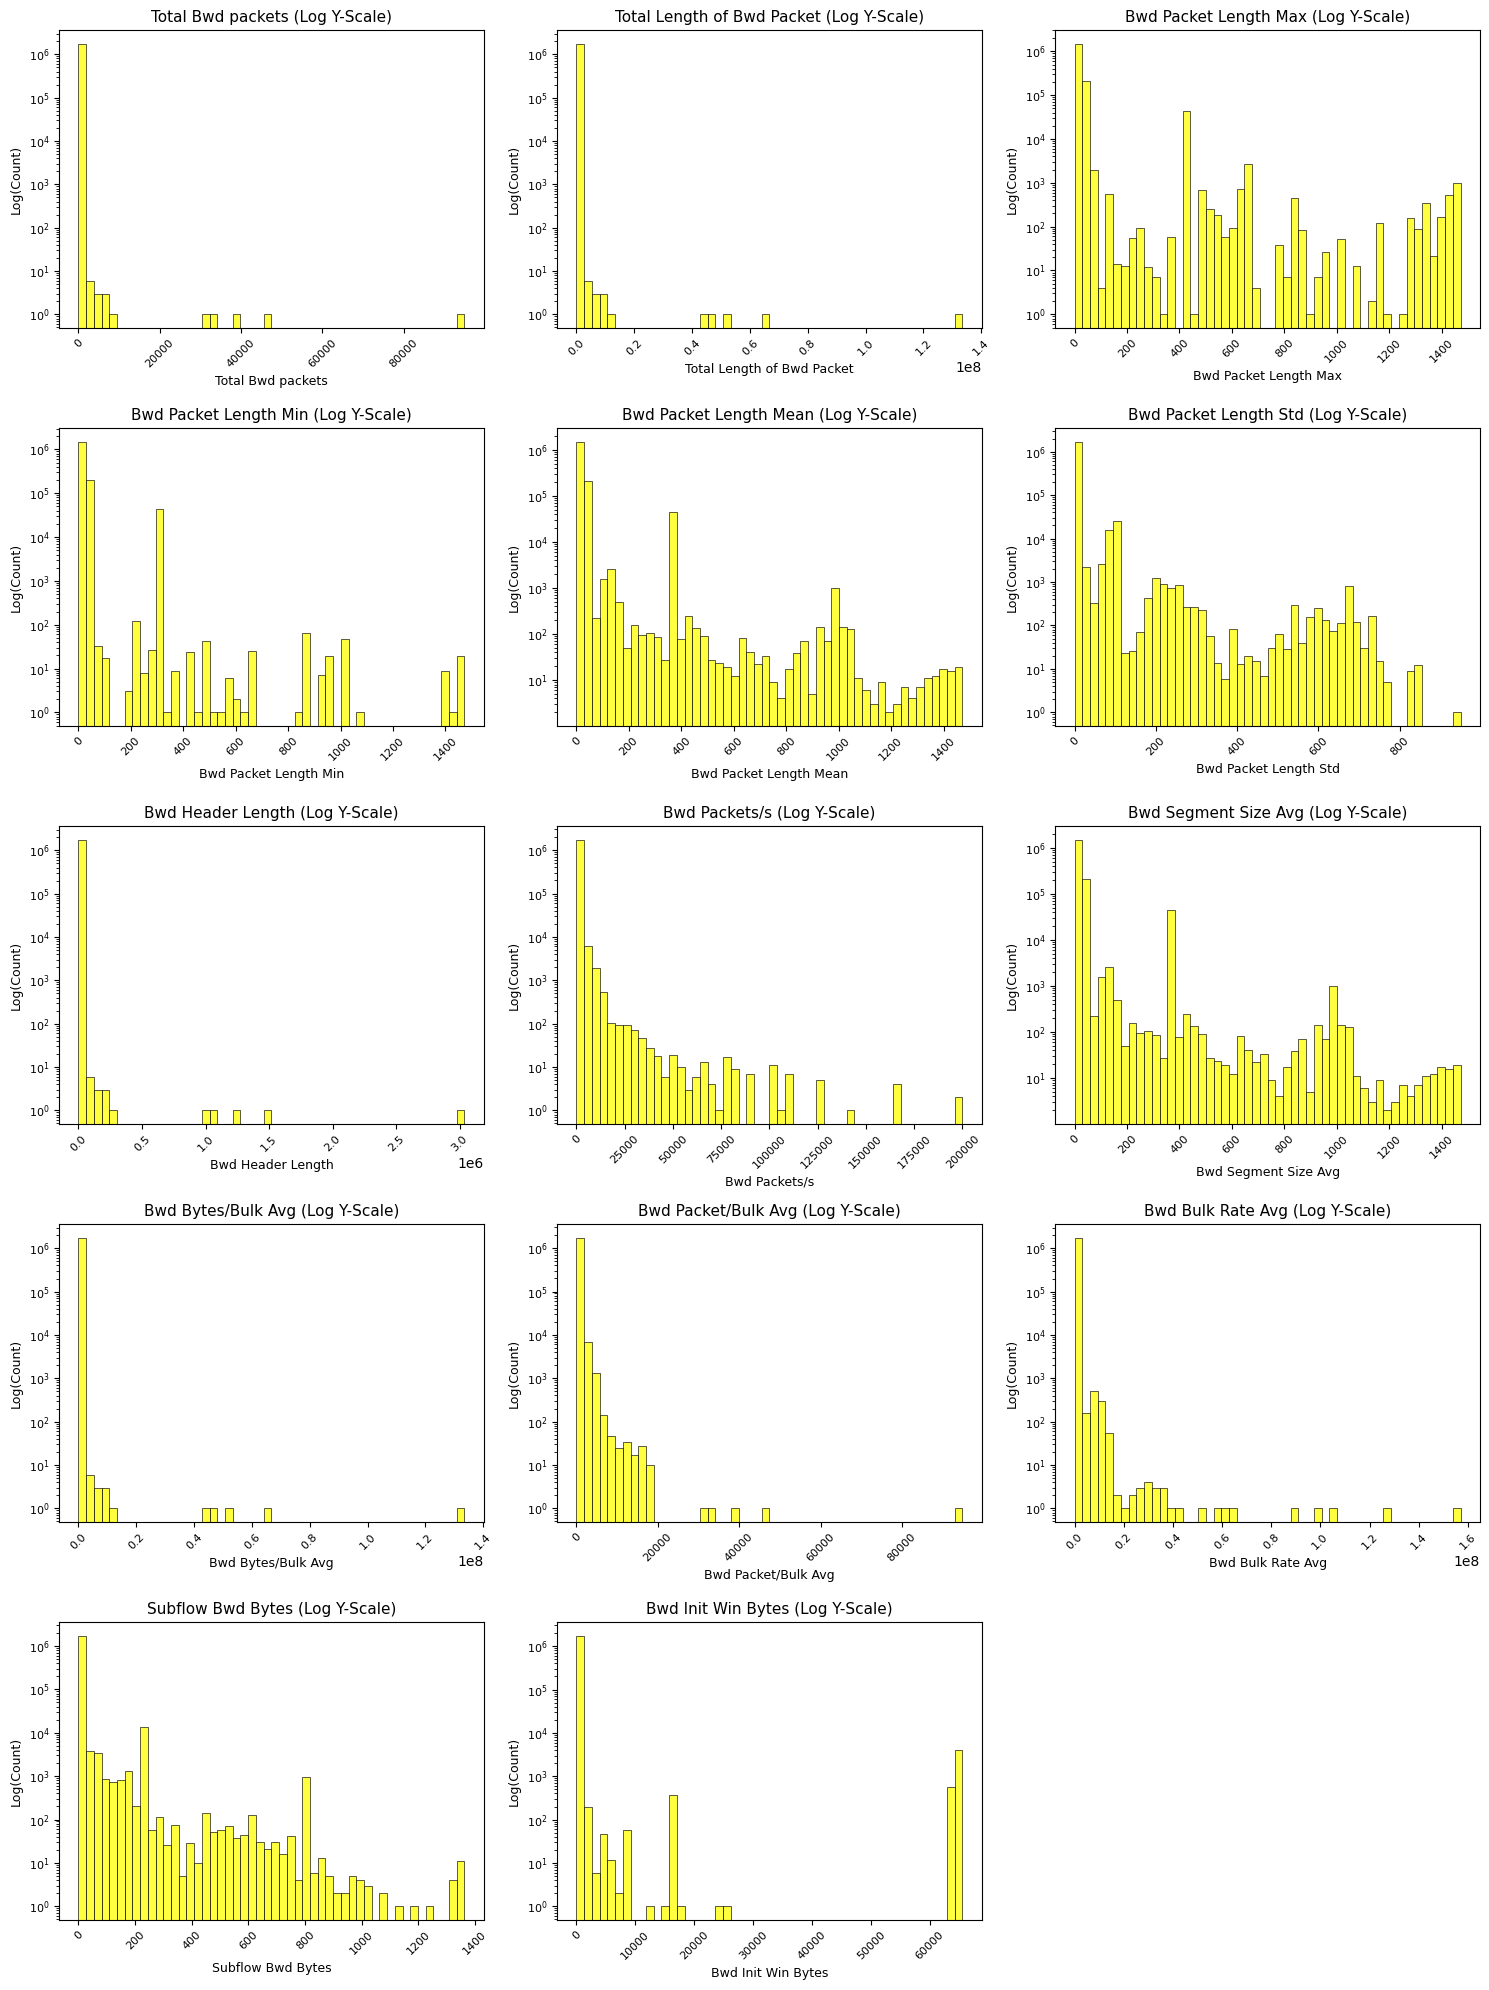

In [34]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Merged_Bwd is a DataFrame of continuous features
num_cols = len(Merged_Bwd.columns)
cols = 3
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(Merged_Bwd.columns):
    ax = axes[i]
    sns.histplot(Merged_Bwd[col], ax=ax, bins=50,
                 edgecolor="black", color="yellow")
    ax.set_yscale("log")
    ax.set_title(f"{col} (Log Y-Scale)", fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel("Log(Count)", fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


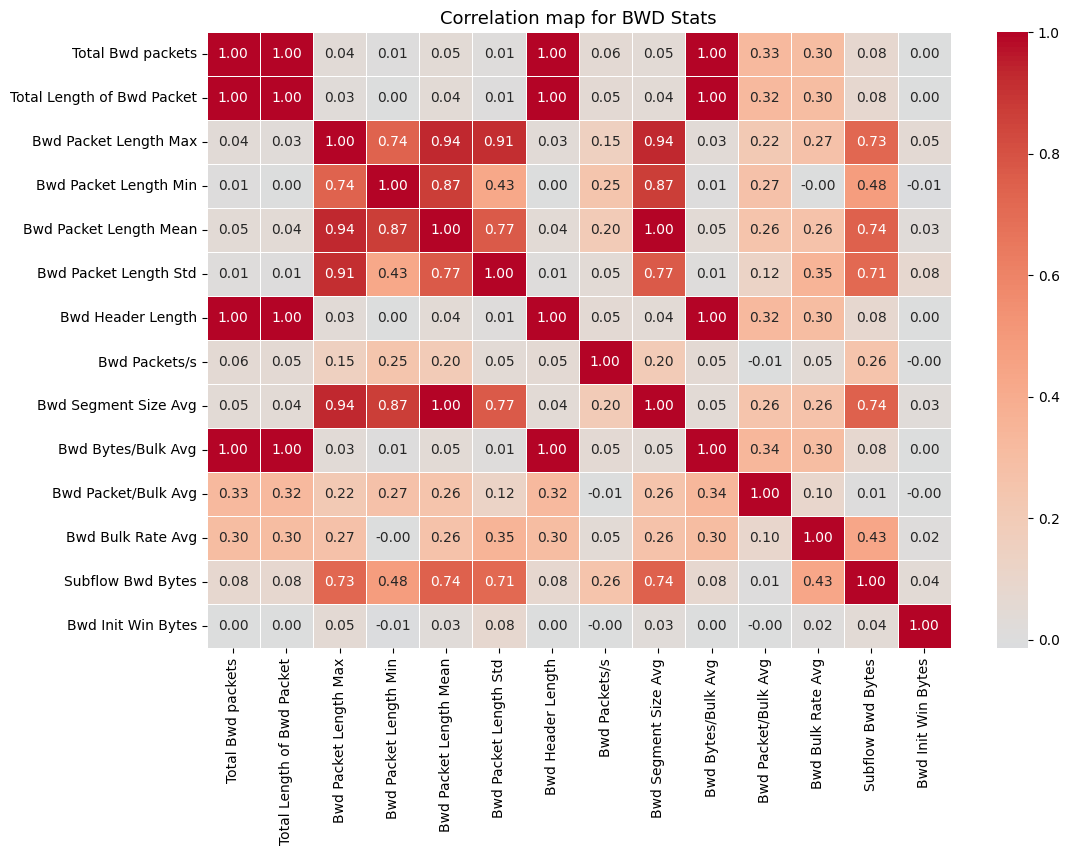

In [49]:
plt.figure(figsize=(12, 8))
plt.title("Correlation map for BWD Stats", fontsize = 13)
sns.heatmap(
   Merged_Bwd.corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.show()

In [38]:
import pandas as pd
import numpy as np

# STEP 1: Filter numeric columns only (recommended)
numeric_df = Merged_Bwd.select_dtypes(include=[np.number])

# STEP 2: Calculate correlation matrix (absolute values)
corr_matrix = numeric_df.corr().abs()

# STEP 3: Get the upper triangle of the correlation matrix
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_df = pd.DataFrame(upper_triangle, index=corr_matrix.index, columns=corr_matrix.columns)

# STEP 4: Mask the correlation matrix with the upper triangle
filtered_corr = corr_matrix.where(upper_df)

# STEP 5: Find columns with correlation > 0.95
to_drop = [column for column in filtered_corr.columns if any(filtered_corr[column] > 0.95)]

# STEP 6: Output and drop
print("📉 Columns to drop due to correlation > 0.95:")
print(to_drop)


reduced_df = Merged_Bwd.drop(columns=to_drop)


📉 Columns to drop due to correlation > 0.95:
['Total Length of Bwd Packet', 'Bwd Header Length', 'Bwd Segment Size Avg', 'Bwd Bytes/Bulk Avg']
